## Prediction

### Random Forest

Let's try random forest. I'd like to start with random forest because I will like to see how different features stack up using feature importances.

#### Import Data

In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)
df = pd.read_csv("clean_data_basic_pdayscat_agecat.csv",index_col=False)

In [22]:
#Let's take all the features in for prediction
predictors = list(df.drop('y',axis=1).columns)
# df[predictors].head()

In [27]:
#Train Test Split
from sklearn.model_selection import train_test_split

X, Xtest, y, ytest = train_test_split(df[predictors],df['y'],random_state=5,test_size=0.3)
print (X.shape)
print (y.shape)

(28550, 50)
(28550,)


#### Some Random Forest Parameters
** 1. n_estimators - ** The number of trees in the forest

** 2. gini - ** The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and
                “entropy” for the information gain. Note: this parameter is tree-specific.
                
** 3. max_features - ** The number of features to consider when looking for the best split

** 4. max_features - ** The number of features to consider when looking for the best split

** 5. min_samples_leaf - ** The number of trees in the forest

** 6. n_estimators - ** The number of trees in the forest

In [29]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import recall_score, f1_score, confusion_matrix


import numpy as np

# Initialize our algorithm with the default paramters
# n_estimators is the number of trees we want to make
# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum number of samples we can have at the place where a tree branch ends (the bottom points of the tree)
rf = RandomForestClassifier(n_estimators=100)
kf = KFold(X.shape[0], n_folds=5, random_state=1)
cv = ShuffleSplit(n_splits=50, test_size=0.3, random_state=50)

predictions = cross_validation.cross_val_predict(rf, X,y,cv=kf)
predictions = pd.Series(predictions)
print (Result (F1) = {}.format(f1_score()))

# scores = cross_val_score(rf, X.values, y.values, scoring='recall', cv=kf)
# Take the mean of the scores (because we have one for each fold)
print("Result (recall) = {}".format(scores.mean()))
print ("Result (F1) = 0.20108989776987696")
# Result without StandardScaler = 0.407736233312
# print("Result with StandardScaler = 0.398665365295")

Result (recall) = 0.2849358472706779
Result (F1) = 0.20108989776987696


I want to swing different parameters to see how accuracy changes

**1. n_estimators**

In [11]:
predictors = list(df.drop('y',axis=1).columns)

kf = KFold(df.shape[0], n_folds=5, random_state=1)
# cv = ShuffleSplit(n_splits=50, test_size=0.3, random_state=50)
scorelist = []
r = list(range(1,100,2))

for i in r:
    
    rf = RandomForestClassifier(random_state=1, n_estimators=i, min_samples_split=10, 
                            min_samples_leaf=10)
    scores = cross_val_score(rf, df[predictors], df["y"], scoring='recall', cv=kf)
    scorelist.append(scores.mean())

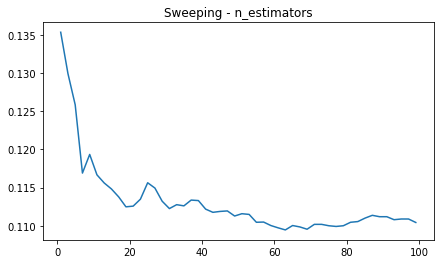

In [12]:
#Plotting
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(7,4))
plt.title("Sweeping - n_estimators")
plt.plot(r,scorelist)

**2. min_samples_split**

In [ ]:
predictors = list(df.drop('y',axis=1).columns)

kf = KFold(df.shape[0], n_folds=5, random_state=1)
cv = ShuffleSplit(n_splits=50, test_size=0.3, random_state=50)
scorelist = []
r = list(range(10,100,10))

for i in r:
    
    rf = RandomForestClassifier(random_state=1, n_estimators=100, min_samples_split=i, 
                            min_samples_leaf=10)
    scores = cross_val_score(rf, df[predictors], df["y"], scoring='recall', cv=kf)
    scorelist.append(scores.mean())

In [ ]:
#Plotting
plt.figure(figsize=(7,4))
plt.title("Sweeping - min_samples_split")
plt.plot(r,scorelist)

In [ ]:
#Plotting
#plt.figure(figsize=(7,4))
#plt.title("Sweeping - min_samples_split")
#plt.plot(r,scorelist)

**2. min_samples_leaf**

In [ ]:
predictors = list(df.drop('y',axis=1).columns)

kf = KFold(df.shape[0], n_folds=5, random_state=1)
cv = ShuffleSplit(n_splits=50, test_size=0.3, random_state=50)
scorelist = []
r = list(range(2,500,10))

for i in r:
    
    rf = RandomForestClassifier(random_state=1, n_estimators=100, min_samples_split=62, 
                            min_samples_leaf=i)
    
    predictions = cross_validation.cross_val_predict(rf, df[predictors],df["y"],cv=kf)
    predictions = pd.Series(predictions)
    scores = cross_val_score(rf, df[predictors], df["y"], scoring='f1', cv=kf)
    scorelist.append(scores.mean())

In [ ]:
#Plotting
plt.figure(figsize=(7,4))
plt.title("Sweeping - min_samples_leaf")
plt.plot(r,scorelist)

##### Different Parameters

In [31]:
rf = RandomForestClassifier(random_state=1, n_estimators=100)
rf.fit(df[predictors],df["y"])
kf = KFold(df.shape[0], n_folds=5, random_state=1)
predictions = cross_validation.cross_val_predict(rf, df[predictors],df["y"],cv=kf)
predictions = pd.Series(predictions)
scores = cross_val_score(rf, df[predictors], df["y"],scoring='f1', cv=kf)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.202292400521


### Important Features

In [10]:
importances=rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])
#predictors=titanic.columns
plt.figure(figsize=(15,10))
plt.title("Feature Importances By Random Forest Model")
plt.bar(range(np.size(predictors)), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(predictors)])
print(sorted_important_features[0:5])

NameError: name 'plt' is not defined

Let's try by only selecting the top features until housing. Same parameters.

In [ ]:
predictors = sorted_important_features[0:12]

rf = RandomForestClassifier(random_state=1, n_estimators=100)
rf.fit(df[predictors],df["y"])
kf = KFold(df.shape[0], n_folds=5, random_state=1)
predictions = cross_validation.cross_val_predict(rf, df[predictors],df["y"],cv=kf)
predictions = pd.Series(predictions)
scores = cross_val_score(rf, df[predictors], df["y"],scoring='f1', cv=kf)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

In [ ]:
len(df)*0.01